In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Thu thập dữ liệu

- Bộ dữ liệu gốc thu được từ một khảo sát tiến hành vào năm 2016 nhằm điều tra nguồn cung nhà ở tại Việt Nam. Khảo sát này tập trung vào lịch sử xây dựng tòa nhà, hiệu suất của tòa nhà và tân trang lại (bộ dữ liệu gốc có thể thu được ở [đây](https://data.4tu.nl/articles/dataset/Survey_of_housing_energy_consumption_and_refurbishment_in_Vietnam_/13109924?file=25143296)).
- Tuy nhiên, nhóm chỉ chọn tập trung vào phân tích hiệu suất năng lượng nhà ở và một số đặc điểm cấu trúc có thể ảnh hưởng đến vấn đề này. Với tiêu chí trên, bộ dữ liệu sẽ được thu gọn như bên dưới.

In [2]:
ec_df = pd.read_excel('energy_consuming.xlsx', index_col=0)
ec_df

,Climatic region,Ownership,Number of occupants,House age,House typology,Function other than residential,Number of floor,Total floor area,summer daylight,summer thermal comfort,...,Gas consumption,maximum electricity consumption,minimum electricity consumption,number of airconditioning,number of electricity water heater,Solar hotwater,Energy efficiency equipment,total energy consumption,energy per person,Unnamed: 25
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-06-10 17:15:18.688,North,shared rent,4,5.0,Attached row house,No,3,110.0,4,2,...,100000.0,440000.0,100000.0,0,1,No,Yes,540000,135000.000000,NaN
2016-06-11 01:18:32.630,Center,privately own,6,5.0,Detached house,No,5,180.0,4,3,...,375000.0,1800000.0,1800000.0,5,5,Yes,No,2175000,362500.000000,NaN
2016-06-13 13:11:38.808,North,privately rent,4,5.0,Attached row house,No,3,30.0,5,1,...,100000.0,240000.0,240000.0,0,1,No,No,340000,85000.000000,NaN
2016-06-14 12:35:00.366,North,privately rent,1,5.0,Attached row house,No,5,30.0,4,3,...,100000.0,100000.0,100000.0,0,0,No,No,200000,200000.000000,NaN
2016-06-13 13:33:24.572,North,privately own,7,5.0,Attached row house,office,5,240.0,4,3,...,NaN,1800000.0,1330000.0,5,5,No,Yes,1800000,257142.857143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-24 08:53:22.405,North,privately own,4,15.0,Attached row house,No,2,70.0,4,4,...,100000.0,675000.0,100000.0,1,2,No,Yes,775000,193750.000000,NaN
2016-06-21 10:29:26.684,North,privately own,3,5.0,Attached row house,No,4,180.0,4,2,...,NaN,1330000.0,930000.0,1,1,Yes,Yes,1330000,443333.333333,NaN
2016-06-30 15:59:18.096,South,privately rent,2,5.0,Apartment,No,1,110.0,2,2,...,100000.0,675000.0,240000.0,3,2,No,No,775000,387500.000000,NaN


## Khám phá dữ liệu và tiền xử lý

In [3]:
ec_df.shape

(153, 25)

In [4]:
ec_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 2016-06-10 17:15:18.688000 to 2016-07-26 06:06:51.481000
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Climatic region                     153 non-null    object 
 1   Ownership                           153 non-null    object 
 2   Number of occupants                 153 non-null    int64  
 3   House age                           150 non-null    float64
 4   House typology                      153 non-null    object 
 5   Function other than residential     153 non-null    object 
 6   Number of floor                     153 non-null    int64  
 7   Total floor area                    146 non-null    float64
 8   summer daylight                     153 non-null    int64  
 9   summer thermal comfort              153 non-null    int64  
 10  summer natural ventilation          153 non-null    int64  

## Tiền xử lý

In [5]:
ec_df = ec_df.drop(columns = ['Unnamed: 25'])

In [6]:
ec_df['Gas consumption'] = ec_df['Gas consumption'].fillna(0)
ec_df.head()

,Climatic region,Ownership,Number of occupants,House age,House typology,Function other than residential,Number of floor,Total floor area,summer daylight,summer thermal comfort,...,Source of energy,Gas consumption,maximum electricity consumption,minimum electricity consumption,number of airconditioning,number of electricity water heater,Solar hotwater,Energy efficiency equipment,total energy consumption,energy per person
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-06-10 17:15:18.688,North,shared rent,4,5.0,Attached row house,No,3,110.0,4,2,...,Electricity and gas,100000.0,440000.0,100000.0,0,1,No,Yes,540000,135000.000000
2016-06-11 01:18:32.630,Center,privately own,6,5.0,Detached house,No,5,180.0,4,3,...,Electricity and gas,375000.0,1800000.0,1800000.0,5,5,Yes,No,2175000,362500.000000
2016-06-13 13:11:38.808,North,privately rent,4,5.0,Attached row house,No,3,30.0,5,1,...,Electricity and gas,100000.0,240000.0,240000.0,0,1,No,No,340000,85000.000000
2016-06-14 12:35:00.366,North,privately rent,1,5.0,Attached row house,No,5,30.0,4,3,...,Electricity and gas,100000.0,100000.0,100000.0,0,0,No,No,200000,200000.000000
2016-06-13 13:33:24.572,North,privately own,7,5.0,Attached row house,office,5,240.0,4,3,...,Electricity,0.0,1800000.0,1330000.0,5,5,No,Yes,1800000,257142.857143


In [7]:
ec_df = ec_df.dropna(axis = 0).reset_index()

In [8]:
ec_df['Timestamp'] = \
    pd.to_datetime(ec_df['Timestamp'], unit='s')
ec_df.head()

,Timestamp,Climatic region,Ownership,Number of occupants,House age,House typology,Function other than residential,Number of floor,Total floor area,summer daylight,...,Source of energy,Gas consumption,maximum electricity consumption,minimum electricity consumption,number of airconditioning,number of electricity water heater,Solar hotwater,Energy efficiency equipment,total energy consumption,energy per person
0,2016-06-10 17:15:18.688,North,shared rent,4,5.0,Attached row house,No,3,110.0,4,...,Electricity and gas,100000.0,440000.0,100000.0,0,1,No,Yes,540000,135000.000000
1,2016-06-11 01:18:32.630,Center,privately own,6,5.0,Detached house,No,5,180.0,4,...,Electricity and gas,375000.0,1800000.0,1800000.0,5,5,Yes,No,2175000,362500.000000
2,2016-06-13 13:11:38.808,North,privately rent,4,5.0,Attached row house,No,3,30.0,5,...,Electricity and gas,100000.0,240000.0,240000.0,0,1,No,No,340000,85000.000000
3,2016-06-14 12:35:00.366,North,privately rent,1,5.0,Attached row house,No,5,30.0,4,...,Electricity and gas,100000.0,100000.0,100000.0,0,0,No,No,200000,200000.000000
4,2016-06-13 13:33:24.572,North,privately own,7,5.0,Attached row house,office,5,240.0,4,...,Electricity,0.0,1800000.0,1330000.0,5,5,No,Yes,1800000,257142.857143


In [9]:
ec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Timestamp                           144 non-null    datetime64[ns]
 1   Climatic region                     144 non-null    object        
 2   Ownership                           144 non-null    object        
 3   Number of occupants                 144 non-null    int64         
 4   House age                           144 non-null    float64       
 5   House typology                      144 non-null    object        
 6   Function other than residential     144 non-null    object        
 7   Number of floor                     144 non-null    int64         
 8   Total floor area                    144 non-null    float64       
 9   summer daylight                     144 non-null    int64         
 10  summer thermal comfort    

## Khám phá dữ liệu (tiếp tục)

In [10]:
ec_df['Climatic region'].value_counts()

North     122
Center     12
South      10
Name: Climatic region, dtype: int64

Dữ liệu khảo sát chỉ được ghi nhận chủ yếu ở khu vực miền Bắc.

## Phân tích dữ liệu

In [11]:
sns.set_theme()

### Phân bố tổng năng lượng tiêu thụ trong các hộ gia đình ở từng miền

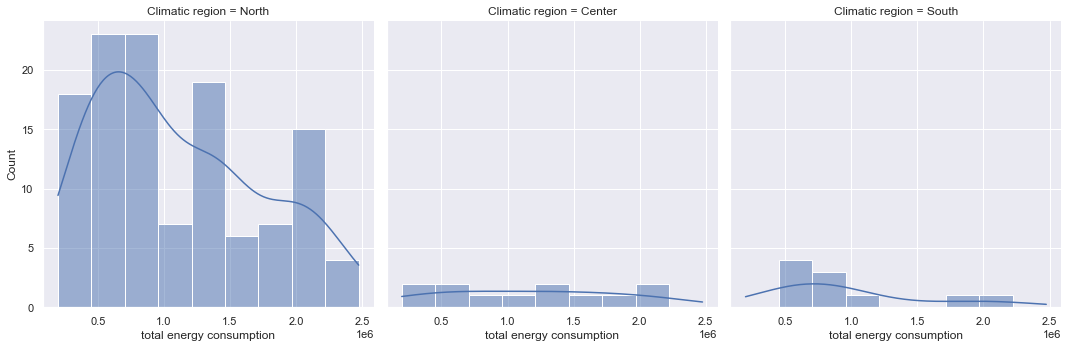

In [12]:
sns.displot(data = ec_df, x = 'total energy consumption', kde = True,
            col = 'Climatic region');

In [13]:
df = ec_df[ec_df['Climatic region'] == 'North']
round(len(df[df['total energy consumption'] < 1000000])/len(df), 2)

0.52

Dựa vào ba biểu đồ và tính toán trên, ta nhận thấy:
- Tổng năng lượng tiêu thụ ở miền Bắc tập trung chủ yếu ở mức dưới 1,000,000J với tỉ lệ trên toàn vùng là hơn 52%.
- Tổng năng lượng tiêu thụ ở miền Trung khá đồng đều ở các mức tiêu thụ.
- Tổng năng lượng tiêu thụ ở miền Nam có sự phân hóa rõ ràng với hai nhóm tiêu thụ ít (500,000 ~ 1,200,000J) và tiêu thụ nhiều (~ 2,000,000J).

Tuy nhiên, với lượng dữ liệu thu được rất hạn chế ở hai miền Trung và Nam, sự phân bố trên có thể chưa phản ánh được chính xác tình hình thực tế ở hai miền này.

### Tiêu thụ năng lượng khi có sử dụng những thiết bị tiết kiệm năng lượng (dùng Solar hotwater và Energy efficiency equipment)

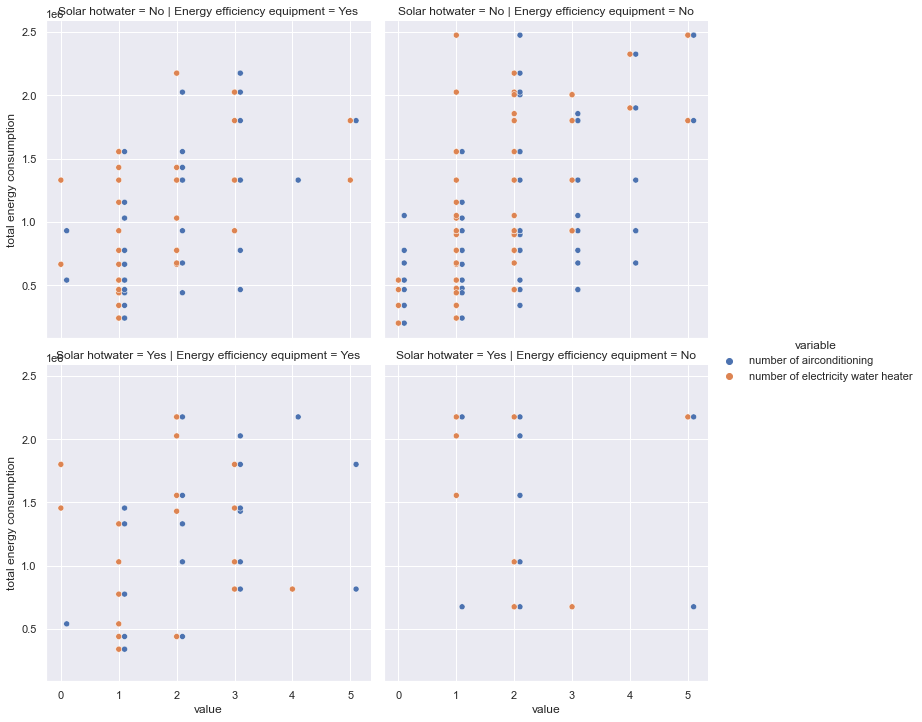

In [14]:
ec_df['number of airconditioning'] = ec_df['number of airconditioning'] + 0.1
ac_wh_df = ec_df.melt(['Solar hotwater', 'Energy efficiency equipment', 'total energy consumption'],
                        ['number of airconditioning', 'number of electricity water heater'])
sns.relplot(data=ac_wh_df, x='value', y='total energy consumption', hue='variable',
            row='Solar hotwater', col='Energy efficiency equipment');
ec_df['number of airconditioning'] = ec_df['number of airconditioning'].astype(int)

Dựa vào bốn biểu đồ ta nhận thấy:
- Các nhà sử dụng thiết bị tiết kiệm năng lượng nhưng không dùng bình nước nóng năng lượng mặt trời thường dùng từ 1 ~ 2 thiết bị làm nóng nước bằng điện và 1 ~ 3 máy điều hòa không khí. Các gia đình sử dụng cách này thường tiêu thụ từkhoảng 250,000 ~ 1,600,000J năng lượng.
- Đối với những ngôi nhà không lắp đặt cả thiết bị tiết kiệm năng lượng và bình nước nóng năng lượng mặt trời thường dùng từ 0 ~ 3 máy điều hòa không khí nhưng cũng chỉ cần 1 ~ 2 thiết bị làm nóng nước bằng điện. Vì có một lượng tương đối các gia đình không sử dụng (hoặc ít) các thiết bị gây tốn kém năng lượng nên mức dao động năng lượng tiêu thụ ở nhóm này khá lớn 150,000 ~ 2,200,000J.
- Nhóm nhà lắp đặt cả thiết bị tiết kiệm điện và bình nước nóng năng lượng mặt trời thường được lắp từ 1 ~ 3 máy điều hòa cũng như thiết bị đun nước bằng điện. Tuy dao động tiêu thụ năng lượng ở nhóm nhà này cũng khá lớn nhưng phần nhiều cũng chỉ nằm trong khoảng 1,500,000J trở xuống. Với số lượng thiết bị xem chừng là nhiều hơn hai nhóm nhà trước nhưng mức độ tiêu thụ năng lượng không tăng quá nhiều (thậm chí có phần thấp hơn) chứng tỏ các thiết bị tiết kiệm năng lượng đem lại hiệu quả tương đối tốt.
- Nhóm nhà chỉ lắp bình nước nóng năng lượng mặt trời mà không có thiết bị tiết kiệm năng lượng chiếm số lượng khá nhỏ khi so với các nhóm còn lại. Mức tiêu thụ năng lượng lớn chiếm phần nhiều dường như cho thấy cách lắp đặt này không quá hiệu quả.

## Các yếu tố tự nhiên nào ảnh hưởng nhất đến việc tiêu thụ năng lượng?

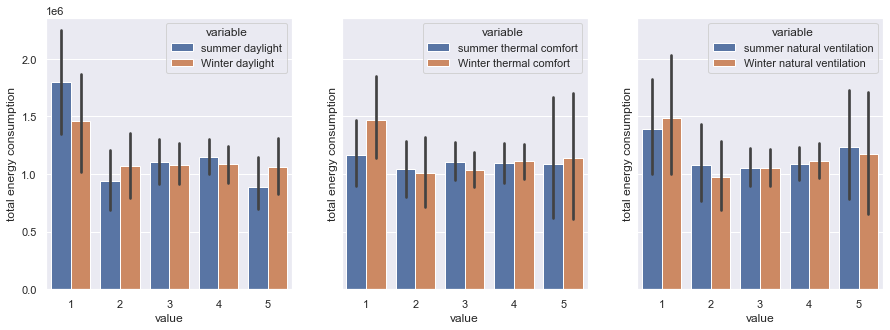

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

dl_df = ec_df.melt(['total energy consumption'], ['summer daylight', 'Winter daylight'])
sns.barplot(ax = axes[0], data=dl_df, x='value', y='total energy consumption', hue='variable')

tc_df = ec_df.melt(['total energy consumption'], ['summer thermal comfort', 'Winter thermal comfort'])
sns.barplot(ax = axes[1], data=tc_df, x='value', y='total energy consumption', hue='variable')

nv_df = ec_df.melt(['total energy consumption'], ['summer natural ventilation', 'Winter natural ventilation'])
sns.barplot(ax = axes[2], data=nv_df, x='value', y='total energy consumption', hue='variable');

Với ba biểu đồ tương ứng ba yếu tố tự nhiên ảnh hưởng đến không gian nhà ở (Độ chiếu sáng vào ban ngày, Nhiệt độ trong nhà và Độ thoáng khí) ở hai mùa đông - hè, ta nhận thấy:
- Ở điều kiện xấu nhất (value = 1), cả ba yếu tố sẽ đều làm tăng mức độ tiêu thụ năng lượng. Trong đó, Độ chiếu sáng vào ban ngày vào mùa hè (summer daylight) thấp làm năng lượng tiêu thụ tăng một cách đáng kể so với các yếu tố khác.
- Xem xét trong những mức độ điều kiện nhà ở khác, cả ba yếu tố không cho thấy sự khác biệt đáng kể.

Kết luận:
- Miễn không trong tình trạng quá tệ, các yếu tố tự nhiên sẽ không tạo ra sự khác biệt trong việc tiêu thụ năng lượng.
- Trường hợp tệ nhất, cần ưu tiên xử lí yếu tố chiếu sáng cho căn nhà nếu thời điểm rơi vào mùa hè, và tùy điều kiện cụ thể nếu vào mùa đông.

## Kiểu nhà và mục đích sử dụng thường thấy

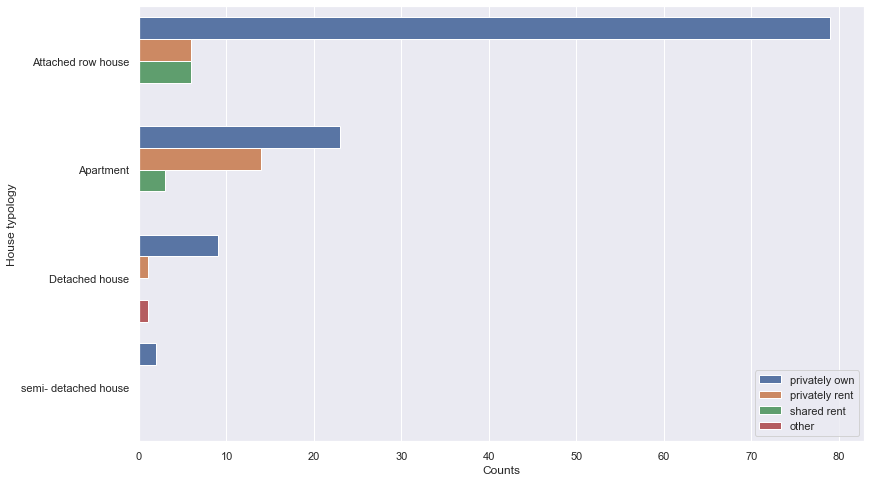

In [16]:
ht_df = ec_df[['Ownership', 'House typology']].value_counts()
ht_df = ht_df.rename('Counts')
ht_df = ht_df.reset_index()

plt.figure(figsize=(13,8))
ax = sns.barplot(data = ht_df, x = 'Counts', y = 'House typology', hue = 'Ownership')
plt.legend(loc='lower right');

Nhận xét:
- Hầu hết các căn nhà ghi nhận trong cuộc khảo sát thuộc diện sở hữu cá nhân (nhà song lập hay semi-detached house hoàn toàn nằm trong diện này).
- Bỏ qua những căn nhà được chỉ dành cho sở hữu cho cá nhân, ta thấy nhà phân lô liền kề (attached row house) và căn hộ (apartment) được cho thuê cá nhân là chủ yếu, một phần nhỏ khác sẽ để thuê theo nhóm.

 ## Đánh giá trung bình mức tiêu thụ năng lượng đối với những hình thái cơ sở vật chất ngoài nhà ở (công sở, cửa hàng kinh doanh,...)?

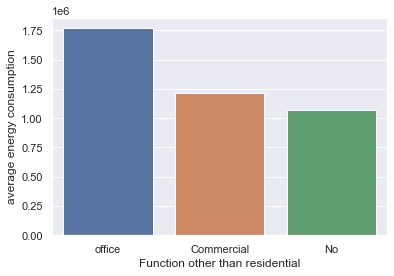

In [17]:
nr_df = ec_df[['Function other than residential', 'total energy consumption']].groupby('Function other than residential').mean()
nr_df = nr_df.rename(columns = {'total energy consumption' : 'average energy consumption'}).reset_index().sort_values('average energy consumption', ascending = False)
sns.barplot(data=nr_df, x='Function other than residential', y='average energy consumption');

Nhận xét:
- Hoạt động công sở cần nhiều tài nguyên hơn hẳn các hoạt động kinh doanh cũng như sinh hoạt gia đình.